In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, InputLayer


In [14]:
# Load the dataset
data = pd.read_csv('housing.csv')

# Display the first few rows of the dataset
print(data.head())

# Display basic information about the dataset
print(data.info())

# Display summary statistics of the dataset
print(data.describe())


           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7229300521  20141013T000000  231300.0         2       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [15]:
# Handle missing values if any
data.dropna(inplace=True)

# Feature engineering (Example: Scaling numerical features)
scaler = StandardScaler()
num_cols = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']
data[num_cols] = scaler.fit_transform(data[num_cols])

# Splitting data into training and testing sets
X = data.drop(['id', 'date', 'price'], axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Linear Regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Random Forest Regression model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Neural Network model
model_nn = Sequential([
    Input(shape=(X_train.shape[1],)),  # Specify input shape in Input
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])
model_nn.compile(optimizer='adam', loss='mean_squared_error')

# Train the Neural Network
history = model_nn.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

In [17]:
# Evaluate Linear Regression model
y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr}, R^2: {r2_lr}")

# Evaluate Random Forest model
y_pred_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Regression MSE: {mse_rf}, R^2: {r2_rf}")

# Evaluate Neural Network model
y_pred_nn = model_nn.predict(X_test)
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)
print(f"Neural Network MSE: {mse_nn}, R^2: {r2_nn}")



Linear Regression MSE: 45173027114.56321, R^2: 0.7011905706891413
Random Forest Regression MSE: 22424744601.291676, R^2: 0.851665350658037
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Neural Network MSE: 148069382755.35797, R^2: 0.020554286801918953


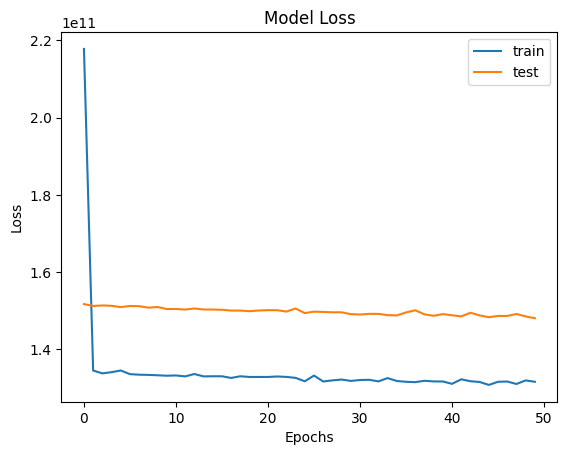

In [18]:
# Example: Loss curve for Neural Network
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
